# <center> Zestaw 6
## <center> Ryszard Pręcikowski
### <center> 401433

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.abc import x
from sympy.calculus.util import continuous_domain
from typing import List

In [15]:
def plot_function(g_i, show = True, a=0, b=3, y_lim=None):
    gl = lambdify(x, g_i)
    x_v = np.linspace(a, b, 500)
    inter = continuous_domain(g_i, x, S.Reals)
    not_in = S.Reals - inter

    if type(not_in) is FiniteSet:
        p = plt.plot([], [], label = g_i)
        for idk in not_in:
            n_x = x_v[x_v < idk]
            x_v = x_v[x_v > idk]

            plt.plot(n_x, gl(n_x), c=p[0].get_c())
        plt.plot(x_v, gl(x_v), c=p[0].get_c())
    else:
        x_v = np.array([x_i for x_i in x_v if x_i in inter])
        plt.plot(x_v, gl(x_v),label = g_i)

    plt.ylim(y_lim)
    plt.legend()
    plt.grid(True)
    plt.xlabel("x")
    plt.ylabel('y')
    if show:
        plt.show()

def plot_relative_errors(functions:dict, n=10, starting=3, only_convergence=False, log_scale=False):
    x_v = [i for i in range(n+1)]
    for g in list(functions.values())[::-1]:
        g_diff = diff(g, x)
        gld = lambdify(x, g_diff)
        if gld(2) > 1 and only_convergence:
            continue
        res, errors, _ = iteration_scheme(g, n=n,
                                          print_steps=False,
                                          starting=starting)
        plt.plot(x_v, errors, label=g)

    plt.legend()
    if log_scale:
        plt.yscale('log')
    plt.grid()
    plt.title('relative error')
    plt.ylabel('error')
    plt.xlabel("k'th iteration")

    plt.show()

### Równanie $f(x) = x^2-3x+2 =0$

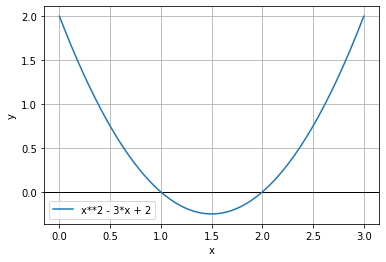

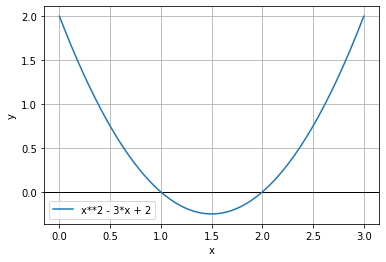

In [16]:
f = x**2 - 3*x + 2

plt.axhline(c='k', linewidth=1)
plot_function(f)

### Funkcje realizujące schemat iteracyjny

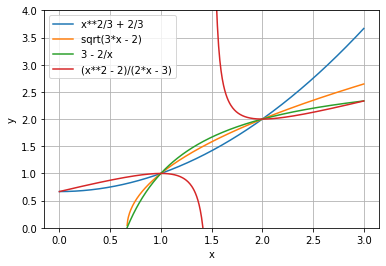

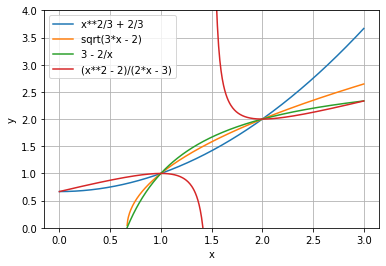

In [17]:
g = {
    1: (x**2 + 2) / 3,
    2: sqrt(3*x - 2),
    3: 3 - 2 / x,
    4: (x**2 - 2) / (2*x -3)
}

for g_i in g.values():
    plot_function(g_i, show=False, y_lim=(0, 4))
plt.show()

### Analiza zbieżności poprzez badanie wartości $|g_i'(2)|$

In [18]:
print("{0:^20}".format("f"), "f'(2)")

for g_i in g.values():
    g_i_diff = diff(g_i, x)

    gld = lambdify(x, g_i_diff)
    print("{0:^20}".format(str(g_i)), gld(2))

         f           f'(2)
    x**2/3 + 2/3     1.3333333333333333
   sqrt(3*x - 2)     0.75
      3 - 2/x        0.5
(x**2 - 2)/(2*x - 3) 0.0
         f           f'(2)
    x**2/3 + 2/3     1.3333333333333333
   sqrt(3*x - 2)     0.75
      3 - 2/x        0.5
(x**2 - 2)/(2*x - 3) 0.0


Pochodna funkcji $g(x) = \frac{x^2 + 2}{3}$ w $x^*=2$ jest większa od 1, co oznacza ze schemat iteracyjny jest rozbieżny.

Dla funckcji $g(x) = \frac {x^2 - 2}{2 x - 3}$ pochodna wynosi 0, więc rząd zbieżności jest co najmniej kwadratowy.

Dla pozostałych funkcji rząd zbieżności jest liniowy.

### Implementacja schematu iteracyjnego

In [19]:
def convergence_rate(x_true, x_prev, x_v, gl):
    def error(x1):
        return np.abs(x1 - x_true, dtype=np.float128)
    with np.errstate(divide='ignore', invalid='ignore'):
        x_next = gl(x_v)
        res = np.log(error(x_v) / error(x_next)) / np.log(error(x_prev) / error(x_v))

    return res

def relative_error(x_val, x_true = 2):
    return abs((x_val - x_true) / x_true)

def iteration_scheme(g, n=10, print_steps = True, starting=3):
    x_v = starting
    
    gl = lambdify(x, g)
    relative_errors = [relative_error(x_v, 2)] * (n+1)
    steps = [x_v] * (n + 1)
    
    if print_steps:
        print('g(x) =', g)
        print("{0:^2}".format('i'), "{0:^25}".format('x'), 'r')
        print(0, " {0:^25}".format(x_v))
        
    for i in range(n):
        x_prev = x_v
        x_v = gl(x_v)
        steps[i+1] = x_v
        r = convergence_rate(2, x_prev, x_v, gl)
        relative_errors[i+1] = relative_error(x_v, 2)
        if print_steps:
            print("{0:^2}".format(i+1), "{0:^25}".format(round(x_v, 6)), round(r, 6))
            
    return x_v, relative_errors, steps

In [20]:
for g_i in g.values():
    iteration_scheme(g_i)
    print()

g(x) = x**2/3 + 2/3
i              x             r
0              3            
1          3.666667          1.245021
2          5.148148          1.365183
3          9.501143          1.547766
4          30.75724          1.778874
5         316.002608         1.950815
6        33286.549409        1.997311
7      369331457.860903      1.999987
8    4.546857525521987e+16   2.0
9    6.891304452465309e+32   2.0
10  1.5830025685522727e+65   2.0

g(x) = sqrt(3*x - 2)
i              x             r
0              3            
1          2.645751          0.894696
2          2.436648          0.922621
3          2.304332          0.94291
4          2.216528          0.957728
5          2.156289          0.968608
6           2.11397          0.976632
7          2.083725          0.982574
8          2.061838          0.986987
9          2.045853          0.990272
10         2.034099          0.992722

g(x) = 3 - 2/x
i              x             r
0              3            
1          2.33333

Dla funkcji $g(x) = \frac{x^2 + 2}{3}$ zgodnie z przewidywaniami oddalamy się bardzo szybko od miejsca zerowego.

Dla funckcji $g(x) = \frac {x^2 - 2}{2 x - 3}$ zbliżamy się do miejsca zerowego najszybciej.

Dla pozostałych funkcji zbliżamy się do miejsca zerowego w tempie zależnym od wartości pochodnej, dla mniejszej wartości pochodnej szybciej.

### Wykresu błędu względnego

Dla wszystkich funkcji g.

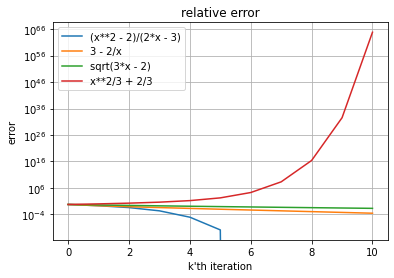

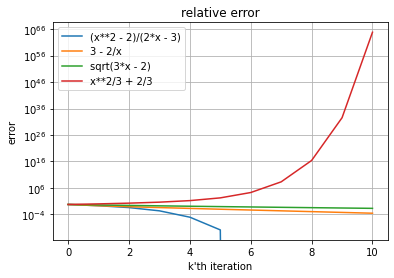

In [21]:
plot_relative_errors(g, log_scale=True)

Tylko dla funkcji, których schemat iteracyjny jest zbieżny.

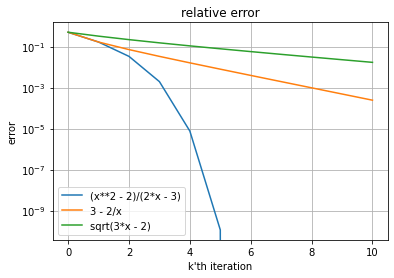

In [28]:
plot_relative_errors(g, only_convergence=True, log_scale=True )

### Implementacja schematu iteracyjnego według metody Newtona.

In [23]:
def newtons_method(f, n=10, starting = 3):
    fl = lambdify(x, f)
    f_diff = diff(f, x)
    fld = lambdify(x, f_diff)

    x_v = starting
    print("{0:^2}".format('i'), "{0:^20}".format('x'))
    print(0, " {0:^20}".format(x_v))
    for i in range(n):
        x_v = x_v - fl(x_v)/fld(x_v)
        print("{0:^2}".format(i+1), "{0:^20}".format(round(x_v, 6)))
    return x_v

### Wyniki dla metody Newtona

f(x) =  x**3 - 2*x - 5 

i           x          
0           3          
1          2.36        
2        2.127197      
3        2.095136      
4        2.094552      
5        2.094551      
6        2.094551      
7        2.094551      
8        2.094551      
9        2.094551      
10       2.094551      


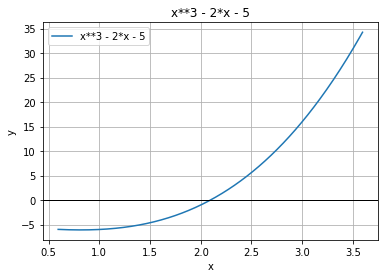


f(x) =  -x + exp(-x) 

i           x          
0           3          
1        0.189703      
2        0.538598      
3        0.566995      
4        0.567143      
5        0.567143      
6        0.567143      
7        0.567143      
8        0.567143      
9        0.567143      
10       0.567143      


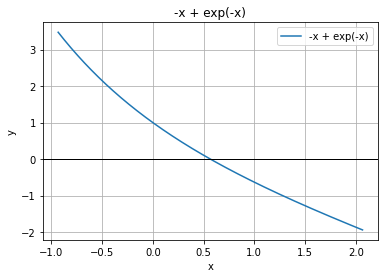


f(x) =  x*sin(x) - 1 

i           x          
0           3          
1        2.796158      
2        2.772948      
3        2.772605      
4        2.772605      
5        2.772605      
6        2.772605      
7        2.772605      
8        2.772605      
9        2.772605      
10       2.772605      


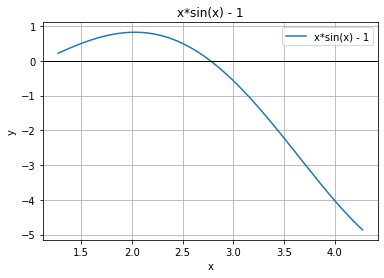


f(x) =  x**3 - 2*x - 5 

i           x          
0           3          
1          2.36        
2        2.127197      
3        2.095136      
4        2.094552      
5        2.094551      
6        2.094551      
7        2.094551      
8        2.094551      
9        2.094551      
10       2.094551      


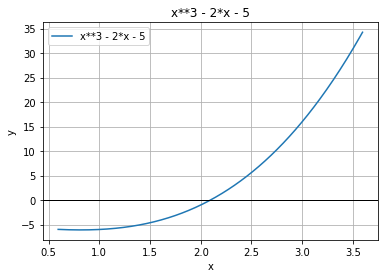


f(x) =  -x + exp(-x) 

i           x          
0           3          
1        0.189703      
2        0.538598      
3        0.566995      
4        0.567143      
5        0.567143      
6        0.567143      
7        0.567143      
8        0.567143      
9        0.567143      
10       0.567143      


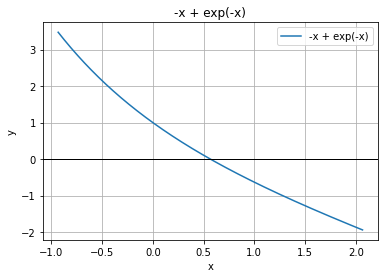


f(x) =  x*sin(x) - 1 

i           x          
0           3          
1        2.796158      
2        2.772948      
3        2.772605      
4        2.772605      
5        2.772605      
6        2.772605      
7        2.772605      
8        2.772605      
9        2.772605      
10       2.772605      


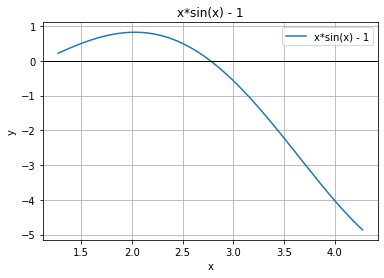

In [24]:
fn = [
    x**3 - 2*x - 5,
    exp(-x)-x,
    x*sin(x)-1
]

for f_i in fn:
    print('f(x) = ', f_i,'\n')
    point = newtons_method(f_i)

    lf = lambdify(x, f_i)
    offset = 1.5
    plot_function(f_i, a=point-offset, b=point+offset, y_lim=None, show=False)

    plt.title(f_i)
    plt.axhline(linewidth=1, color='k')

    plt.show()
    print()

Metoda Newtona dla pojedynczego miejsca zerowego ma zbieżność kwadratową.

Jeśli znamy $x_0$, czyli przybliżenie pierwiastka z dokładnościa 4 bitów, to aby osiągnąć określoną dokładność należy wykonać:
- 24 bitowa dokladność - 4 iteracje
- 53 bitowa dokladność - 5 iteracji

### Implementacja metody Newtona dla wielu wymiarów.

In [25]:
def newtons_method_k_dimensions(f_list: List, symbols, n=10, starting=None):
    def eval(matrix):
        return np.array(matrix.subs(x_v), dtype='float')
    def add_to_x(s):
        to_add = x_v[:, 1].reshape(k, 1)
        to_add += s
    
    f_matrix = Matrix(f_list)
    jacobian = f_matrix.jacobian(Matrix(list(symbols)))

    k = len(f_list)
    x_v = [(s, 0) for s in symbols]
    x_v = np.array(x_v)
    
    if starting is None:
        add_to_x(np.array([1.51 for _ in range(k)]).reshape(k,1))
    else:
        add_to_x(np.array(starting).reshape(k,1)) #ewentualnie zmienić na bezposrednia reprezentacje
    
    print('i:', 0)
    print(x_v)

    for i in range(n):
        s = np.linalg.solve(eval(jacobian), -eval(f_matrix))
        add_to_x(s)
        
        print('i:', i+1)
        print(x_v)
        print()

### Wyniki działania

In [27]:
x1 = Symbol('x1')
x2 = Symbol('x2')

f1 = x1**2 + x2**2 - 1
f2 = x1**2 - x2

newtons_method_k_dimensions([f1, f2], f1.free_symbols)

i: 0
[[x2 1.51]
 [x1 1.51]]
i: 1
[[x2 0.8159452736318408]
 [x1 1.0251805541827288]]

i: 2
[[x2 0.6329163996937488]
 [x1 0.8212756092074754]]

i: 3
[[x2 0.6181317391909519]
 [x1 0.7869619838810478]]

i: 4
[[x2 0.6180339930227137]
 [x1 0.7861517979525026]]

i: 5
[[x2 0.6180339887498949]
 [x1 0.7861513777575356]]

i: 6
[[x2 0.6180339887498949]
 [x1 0.7861513777574233]]

i: 7
[[x2 0.6180339887498949]
 [x1 0.7861513777574233]]

i: 8
[[x2 0.6180339887498949]
 [x1 0.7861513777574233]]

i: 9
[[x2 0.6180339887498949]
 [x1 0.7861513777574233]]

i: 10
[[x2 0.6180339887498949]
 [x1 0.7861513777574233]]

